Files already downloaded and verified
Files already downloaded and verified


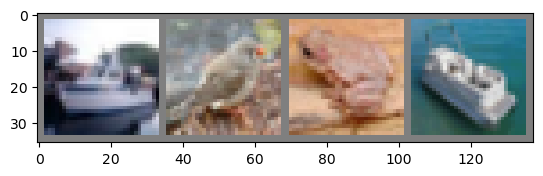

 ship bird frog ship


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)

trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)

testset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)

testloader=torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)

classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')


import matplotlib.pyplot as plt

#构建展示图片的函数
def imshow(img):
    img=img/2+0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

#从数据迭代器中读取一张图片
dataiter=iter(trainloader)
images,labels=dataiter.next()

#展示图片
imshow(torchvision.utils.make_grid(images))
#打印标签
print(''.join('%5s'% classes[labels[j]] for j in range(4)))



In [2]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        #定义两个卷积层
        self.conv1=nn.Conv2d(3,6,5)#有RGB的图片第一个参数channel应该为3,这里为了看size的变化才写1的
        self.conv2=nn.Conv2d(6,16,5)
        #定义池化层
        self.pool=nn.MaxPool2d(2,2)
        #定义三个全连接层
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)

    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        #变换x的形状以适配全连接层的输入
        x=x.view(-1,16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)

        return x
#input[1, 1, 32, 32]->conv1poll[1, 6, 14, 14]->conv2pool[1, 16, 5, 5]->view[1, 400]->linear1relu[1, 120]->linear2relu[1,84]->linear3relu[10]
net=Net()
print(net)

import torch.optim as optim

#定义损失函数，选用交叉熵损失函数
criterion=nn.CrossEntropyLoss()
#定义优化器，选用随机梯度下降的优化器
#optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)


#改为选用adam优化算法
# define the Adam optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [3]:
#编写训练集代码
for epoch in range(10):
    running_loss=0.0
    #按批次迭代训练模型
    for i,data in enumerate(trainloader,0):
        #从data中去除含有输入图像的张量inputs，标签张量labels
        inputs,labels=data
        #第一步梯度清零
        optimizer.zero_grad()
        #第二步将输入图像进入网络中，得到输出张量
        outputs=net(inputs)
        #计算损失值
        loss=criterion(outputs,labels)
        #进行反向传播和梯度更新
        loss.backward()
        optimizer.step()

        #打印训练的信息
        running_loss+=loss.item()
        if (i+1)%2000==0:
            print('[%d,%5d] loss:%.3f'%(epoch+1,i+1,running_loss/2000))
            running_loss=0.0

print('Finished training')



[1, 2000] loss:1.874
[1, 4000] loss:1.610
[1, 6000] loss:1.528
[1, 8000] loss:1.472
[1,10000] loss:1.446
[1,12000] loss:1.377
[2, 2000] loss:1.324
[2, 4000] loss:1.302
[2, 6000] loss:1.319
[2, 8000] loss:1.295
[2,10000] loss:1.281
[2,12000] loss:1.275
[3, 2000] loss:1.187
[3, 4000] loss:1.192
[3, 6000] loss:1.209
[3, 8000] loss:1.203
[3,10000] loss:1.188
[3,12000] loss:1.181
[4, 2000] loss:1.097
[4, 4000] loss:1.127
[4, 6000] loss:1.135
[4, 8000] loss:1.124
[4,10000] loss:1.127
[4,12000] loss:1.130
[5, 2000] loss:1.068
[5, 4000] loss:1.065
[5, 6000] loss:1.064
[5, 8000] loss:1.076
[5,10000] loss:1.070
[5,12000] loss:1.099
[6, 2000] loss:1.009
[6, 4000] loss:1.023
[6, 6000] loss:1.040
[6, 8000] loss:1.060
[6,10000] loss:1.039
[6,12000] loss:1.050
[7, 2000] loss:0.974
[7, 4000] loss:0.973
[7, 6000] loss:0.981
[7, 8000] loss:1.027
[7,10000] loss:1.015
[7,12000] loss:1.022
[8, 2000] loss:0.918
[8, 4000] loss:0.960
[8, 6000] loss:0.952
[8, 8000] loss:0.984
[8,10000] loss:0.998
[8,12000] los

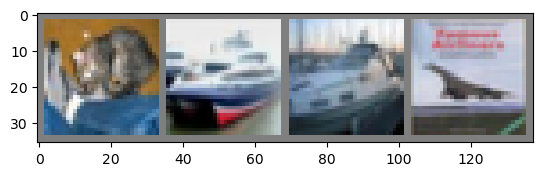

GroundTruth   cat ship shipplane


TypeError: %d format: a number is required, not str

In [4]:
#设定模型的保存位置
PATH='./cifar_net.pth'
#保存模型的状态字典
torch.save(net.state_dict(),PATH)#***********************************************


#在测试集中取出一个批次的数据，做图像和标签的展示
dataiter=iter(testloader)
images,labels=dataiter.next()

#打印原始图片
imshow(torchvision.utils.make_grid(images))
#打印真实的标签
print('GroundTruth',''.join('%5s'% classes[labels[j]] for j in range(4)))


#加载模型参数，在测试阶段
net.load_state_dict(torch.load(PATH))#*****************************************

#利用模型对图片进行预测
outputs=net(images)

#模型有10个类别的输出，选取其中概率最大的那个类别作为预测值
_,predicted=torch.max(outputs,1)

#打印预测标签
print('Predicted:',''.join('%5d'% classes[predicted[j]] for j in range(4)))



In [22]:
#在这整个测试集上测试模型的准确率
correct=0
total=0
with torch.no_grad():
    for data in testloader:
        images,labels=data
        outputs=net(images)
        _,predicted=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()

print('Accuracy of the network on the 10000 test images:%d %%'%(100*correct/total))


#分别测试不同类别的模型准确率
class_correct=list(0. for i in range(10))
class_total=list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images,labels=data
        outputs=net(images)
        _,predicted=torch.max(outputs,1)
        c=(predicted==labels).squeeze()
        for i in range(4):
            label=labels[i]
            class_correct[label]+=c[i].item()
            class_total[label]+=1

#打印不同类别的准确率
for i in range(10):
    print('Accurary of %5s : %2d %%'% (classes[i],100*class_correct[i]/class_total[i]))



Accuracy of the network on the 10000 test images:61 %
Accurary of plane : 65 %
Accurary of   car : 70 %
Accurary of  bird : 56 %
Accurary of   cat : 46 %
Accurary of  deer : 51 %
Accurary of   dog : 52 %
Accurary of  frog : 69 %
Accurary of horse : 68 %
Accurary of  ship : 71 %
Accurary of truck : 67 %


In [8]:
#在GPU上训练模型
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

#将模型转移到GPU上
net.to(device)

#将输入的图片张量和标签张量转移到GPU上
inputs,labels=data[0].to(device),data[1].to(device)



cuda:0
